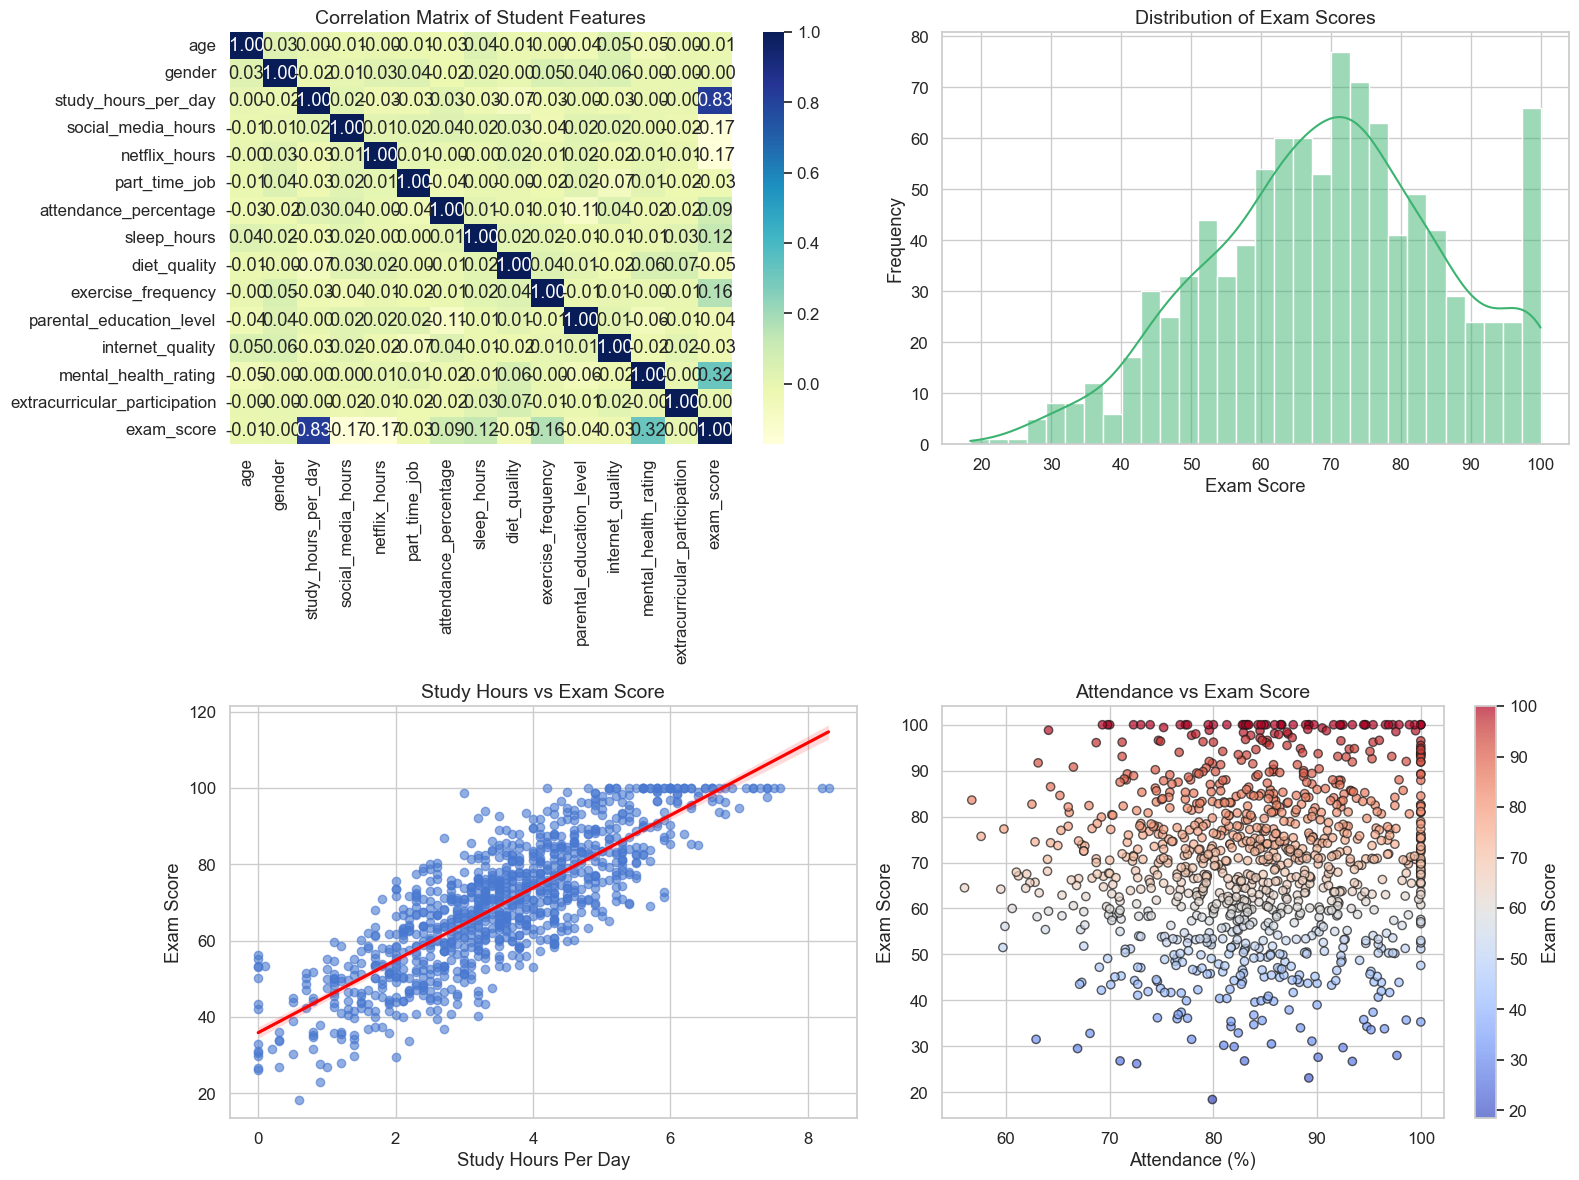

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("student_habits_performance.csv")
data = df.copy()


categorical_cols = ['gender', 'part_time_job', 'diet_quality', 
                    'parental_education_level', 'internet_quality', 
                    'extracurricular_participation']


for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes


correlation_matrix = data.corr(numeric_only=True)


sns.set(style="whitegrid", palette="muted", font_scale=1.1)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[0, 0])
axes[0, 0].set_title("Correlation Matrix of Student Features", fontsize=14)


sns.histplot(data['exam_score'], bins=30, kde=True, color='mediumseagreen', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Exam Scores", fontsize=14)
axes[0, 1].set_xlabel("Exam Score")
axes[0, 1].set_ylabel("Frequency")


sns.regplot(data=data, x='study_hours_per_day', y='exam_score', scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red'}, ax=axes[1, 0])
axes[1, 0].set_title("Study Hours vs Exam Score", fontsize=14)
axes[1, 0].set_xlabel("Study Hours Per Day")
axes[1, 0].set_ylabel("Exam Score")


sc = axes[1, 1].scatter(data['attendance_percentage'], data['exam_score'],
                        c=data['exam_score'], cmap='coolwarm', edgecolor='k', alpha=0.7)
axes[1, 1].set_title("Attendance vs Exam Score", fontsize=14)
axes[1, 1].set_xlabel("Attendance (%)")
axes[1, 1].set_ylabel("Exam Score")
fig.colorbar(sc, ax=axes[1, 1], label='Exam Score')


plt.tight_layout() 
plt.show()
